In [184]:
import numpy as np
from scipy import *
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from xppcall import xpprun
import networkx as nx
import conley_functions as cf
import subprocess
import nolds
####Set up network weights
a = 16
b = 12
d = 4
e = -2
# W = np.array([[a, e, e, -b, 0, 0], [e, a, 2*e, 0, -b, 0], [e, e, a, 0, 0, -b],
#               [a, 0, 0, -d, e, e], [0, a, 0, e, -d, 2*e], [0, 0, a, e, e, -d]])
# W = np.array([[a, e, e, -b, 0], [e, a, e, 0, -b], [e, e, a, -b, 0],
#               [a, 0, -d, -d, e], [0, a, e, e, -d]])
# W = np.array([[a, e, -b, e], [e, a, e, -b],
#               [a, 2*e, -d, e], [e, a, e, -d]]) 
# W = np.array([[a, 0, -b, 0], [0, a, 0, -b],
#               [a, 0, -d, 0], [0, a, 0, -d]]) 
# W = array([[ a, -b,    0],
#            [ a,  -d ,  0],
#            [ 0,  0,   0]])
W = np.loadtxt("WN4_chaos.txt", delimiter=',')
# W = Weights[75]#np.zeros((4,4))
# W = np.zeros((4,4))
# ps = [-1,-1,-1,-1,-4,-4]
# ps = [-1,-1,-4,-4]
# ps = [-1,-4,-np.pi]
N = W.shape[0]
if N == 6:
    ps = [-1,-1,-1,-4,-4,-4]
if N == 5:
    ps = [-1,-1,-1,-4,-4]
if N == 4:
    ps = [-1,-1,-4,-4]
if N == 3:
    ps = [-1,-4,-2]
    ps = [-1,-4,-1]
#     ps = [-1,-1,-1]

In [185]:
W.shape
# W = Weights[13]

(4, 4)

In [186]:
#make file to simulate Wilson-Cowan network with XPP
time=500
dt=0.05
P = 1
expn = 20
gamma = 1
Weights = []
datass = []
initss = []
for expi in range(expn):
#     Ws = W
#     ps =  np.random.randint(-gamma,gamma,size=(N,1))
    Wp = np.random.randint(-gamma,gamma,size=(N,N))
    
    Ws = W + Wp
#     Ws = W + gamma*(np.random.random(size=(N,N))-0.5)
    Weights.append(Ws)
    wcstring = cf.make_wc(Ws, ps, dt=dt)
    with open('wc_p.ode', 'w') as f:
        f.writelines(wcstring)

    datas = np.zeros((P, int(.1/dt)*time*10+1, N))
    data_length_list = []
    for j in range(P):
        inits = np.random.rand(N)
        initss.append(inits)
        inits_dict={}
        for i,init in enumerate(inits[:]):
            inits_dict['x'+str(i+1)]=init
        npa, vn = xpprun('wc_p.ode',inits=inits_dict, parameters={'total':time}, clean_after=True)
        datas[j, :, :] = npa[:,1:].copy()
        data_length_list.append(npa[:,1:].shape[0])
    datass.append(datas)

<IPython.core.display.Javascript object>


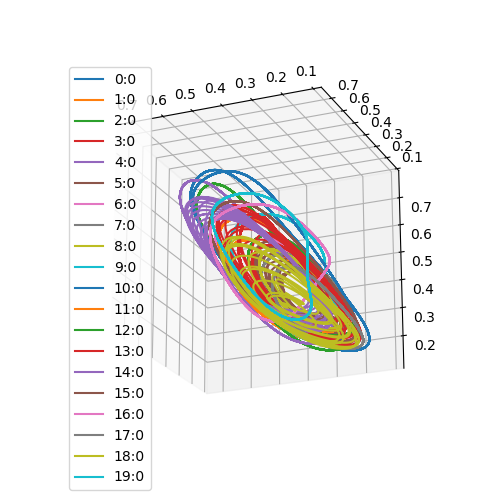

In [209]:
%matplotlib notebook
colors = ['b', 'g', 'r', 'c', 'm', 'y']# c=colors[k+j%6],
time=500
shift=int((int(.1/dt)*time*10+1)*.9)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
for j in range(expn):
    for k in range(P):
        ax.plot(datass[j][k,shift:,0], datass[j][k,shift:,1], datass[j][k,shift:,2], '-', label=str(j)+':'+str(k))
plt.legend()
plt.show()

In [81]:
Ws, ps

(array([[ 15.,   0., -14.,  -4.],
        [ -2.,  17.,   0., -14.],
        [ 16.,  -1.,  -2.,  -2.],
        [  4.,  13.,  -4.,  -5.]]), [-1, -1, -4, -4])

In [192]:
Weights[18]

array([[ 15.,  -1., -14.,  -2.],
       [  0.,  15.,  -1., -14.],
       [ 14.,  -1.,  -5.,   0.],
       [ -1.,  15.,  -1.,  -6.]])

In [50]:
# from scipy.optimize import fsolve
# import math

# def f(u):
#     return 1/(1+np.exp(-u))

# def equations(p):
#     x, y = p
#     return (-x+f(16*x-13*y-1), -y+f(16*x-13*y-4))

# x, y =  fsolve(equations, (0, 1))

# print(equations((x, y)))

<IPython.core.display.Javascript object>


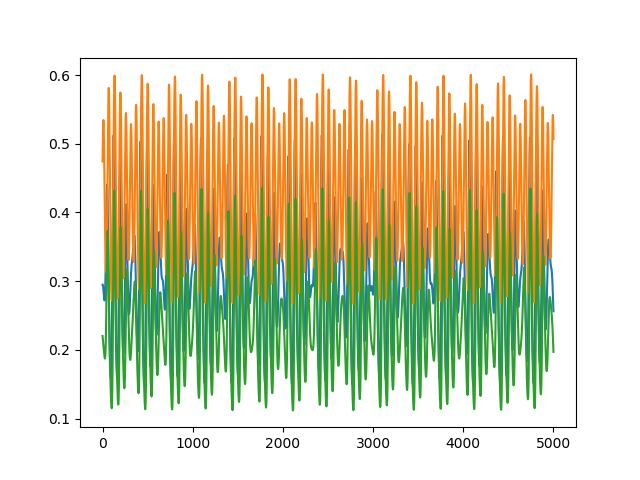

In [199]:
%matplotlib notebook
j=18
shift=int(time*10.)
plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,0])
plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,1])
plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,2])

In [18]:
em = cf.embed(npa[-90000:,1], 3, 100, 100)

<IPython.core.display.Javascript object>


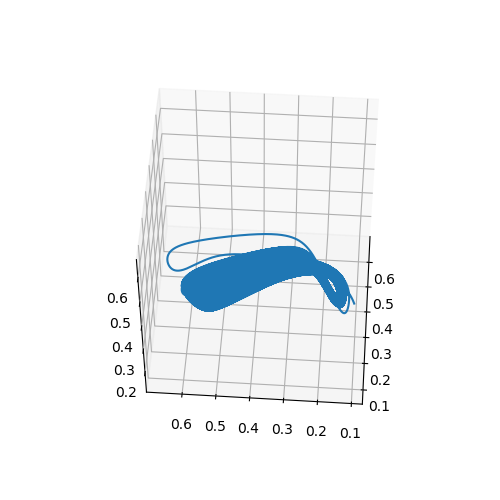

In [19]:
%matplotlib notebook
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot(em[:,0], em[:,1], em[:,2], '-', label=str(j)+':'+str(k))
plt.show()

In [245]:
# import scipy
# scipy.linalg.null_space(Weights[6])

In [200]:
time=5000
Ws = Weights[18]
wcstring = cf.make_wc(Ws, ps, dt=dt)
with open('wc_p.ode', 'w') as f:
    f.writelines(wcstring)
data_length_list = []
npa, vn = xpprun('wc_p.ode', parameters={'total':time}, clean_after=True)
data_length_list.append(npa[:,1:].shape[0])

<IPython.core.display.Javascript object>


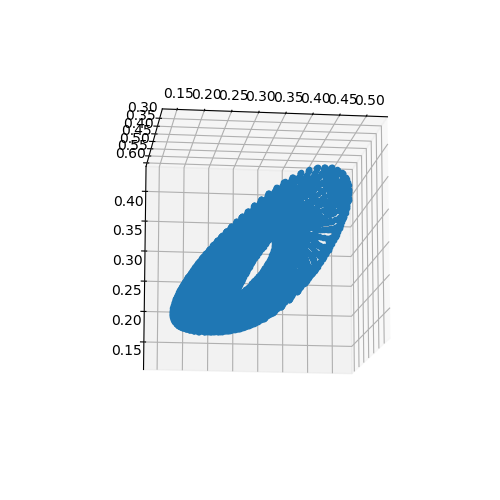

In [206]:
%matplotlib notebook
shift=int(time*19.)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
plt.plot(npa[shift:,1], npa[shift:,2], npa[shift:,3], '.')
plt.show()

In [208]:
# %matplotlib notebook
# shift=int(time*19.)
# fig = plt.figure(figsize=(5,5))
# ax = fig.add_subplot(111, projection='3d')
# plt.plot(npa[shift:,2], npa[shift:,3], npa[shift:,4], '.')
# plt.show()

<IPython.core.display.Javascript object>


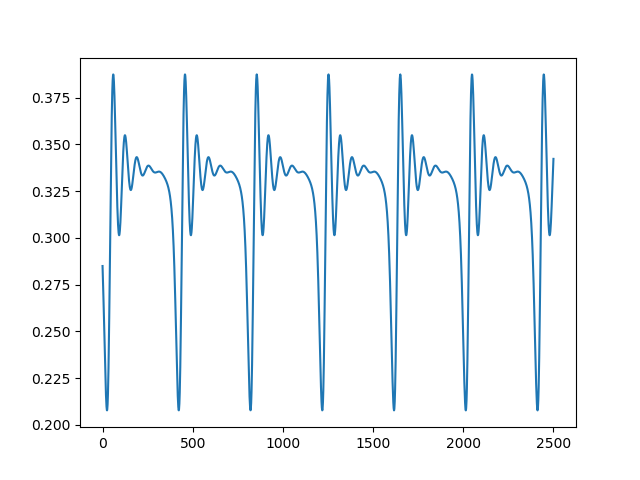

In [174]:
%matplotlib notebook
shift=int(time*19.5)
plt.plot(range(npa[shift:,0].shape[0]), npa[shift:,3])

In [202]:
npa[1000::100,1].shape

(991,)

In [145]:
from ripser import ripser
from persim import plot_diagrams
from sklearn.manifold import Isomap

<IPython.core.display.Javascript object>


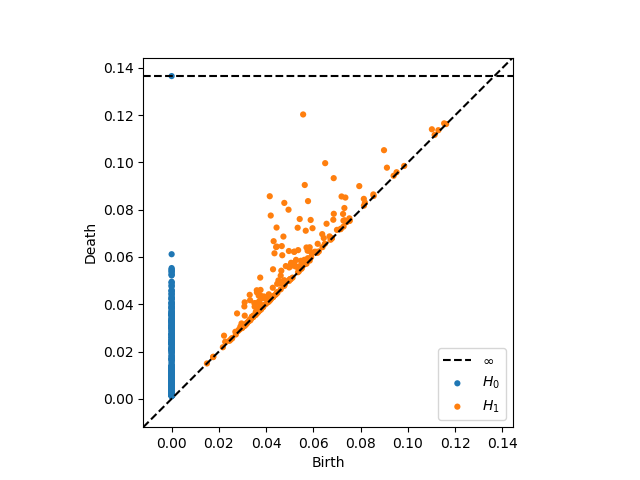

In [205]:
%matplotlib notebook

dgms=ripser(npa[10000::100,1:],maxdim=1)['dgms']#
plot_diagrams(dgms, show=True)

In [10]:
X = npa[-500:,1:]
X.shape
embedding = Isomap(n_components=3)
X_transformed = embedding.fit_transform(X[:])
X_transformed.shape

NameError: name 'Isomap' is not defined

<IPython.core.display.Javascript object>


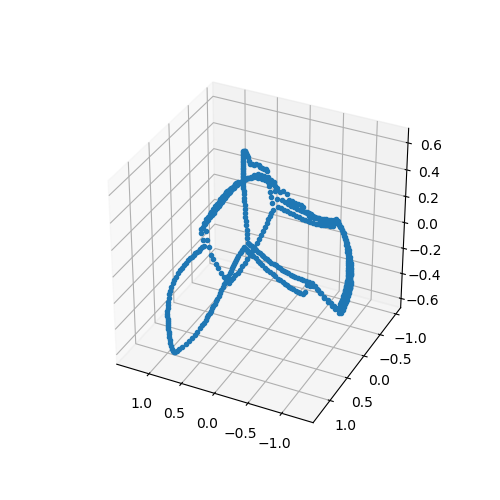

In [13]:
%matplotlib notebook
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
plt.plot(X_transformed[:,0], X_transformed[:,1], X_transformed[:,2], '.')
plt.show()

In [82]:
# P=100
# time=500
# Ws = Weights[2]
# wcstring = cf.make_wc(Ws, ps)
# with open('wc_p.ode', 'w') as f:
#     f.writelines(wcstring)
# datas = np.zeros((P, 20*time+1, N))
# for j in range(P):
#         inits = np.random.rand(N)
# #         print(j, inits)
#         inits_dict={}
#         for i,init in enumerate(inits[:]):
#             inits_dict['x'+str(i+1)]=init
#         npa, vn = xpprun('wc_p.ode',inits=inits_dict, parameters={'total':time}, clean_after=True)
#         datas[j, :, :] = npa[:,1:].copy()
#         data_length_list.append(npa[:,1:].shape[0])

<IPython.core.display.Javascript object>


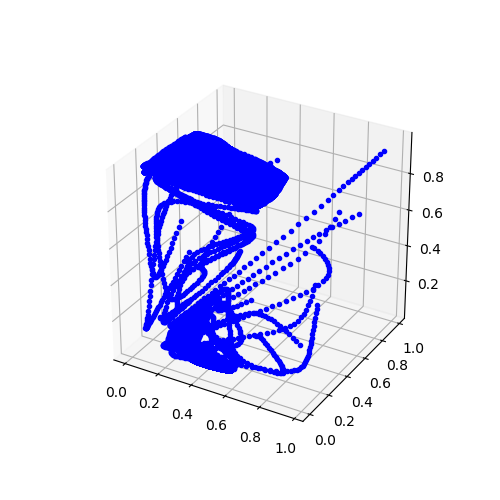

In [222]:
# %matplotlib notebook
# colors = ['b', 'g', 'r', 'c', 'm', 'y']
# shift=int(time*0)
# fig = plt.figure(figsize=(5,5))
# ax = fig.add_subplot(111, projection='3d')
# for k in range(P):
#     ax.plot(datas[k,shift:,0], datas[k,shift:,1], datas[k,shift:,2], '.', c=colors[j%6], label=str(j)+':'+str(k))
# # plt.legend()
# plt.show()

In [160]:
# np.savetxt("WN3_spikish2.txt", Weights[19], delimiter=',')
np.savetxt("WN4_spiking2.txt", Weights[11], delimiter=',')
# W = np.loadtxt("WN6_chaos_4.txt", delimiter=',')

<IPython.core.display.Javascript object>


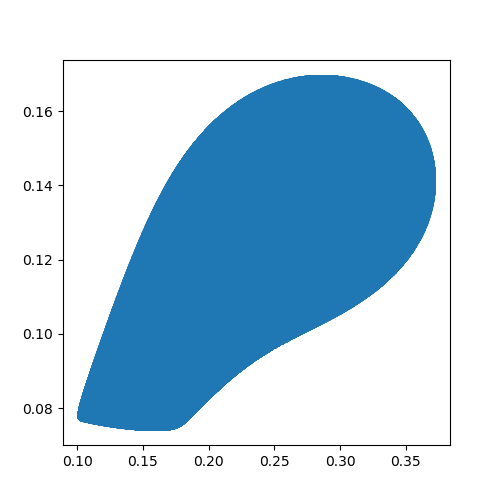

In [103]:
shift=int(time*10.)
fig = plt.figure(figsize=(5,5))
plt.plot(npa[shift:,3], npa[shift:,1], '.')
plt.show()

In [66]:
nolds.lyap_r(npa[:,1])

/home/abel/anaconda3/envs/atds/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


0.022675895690917866

In [31]:
npa[shift:,1].shape

(100001,)

In [29]:
#Make combinatorial dynamical system from the data
shift=int(time*1.)
hdatas = npa[-2000:,1:]
data_length_list = [npa[shift:,1:].shape[0]]
nbins = 2**4
delta = 1/nbins
print(delta)
cds = cf.Combinatorial_Dynamical_System(delta)
cds.get_cubesandgraph(hdatas[:,:], nbins, data_length_list)

0.0625


In [30]:
#Get the recurrent components (Morse sets)
RCs = cds.get_recurrent_components(includeselfedges=False)
len(RCs)

1

<IPython.core.display.Javascript object>


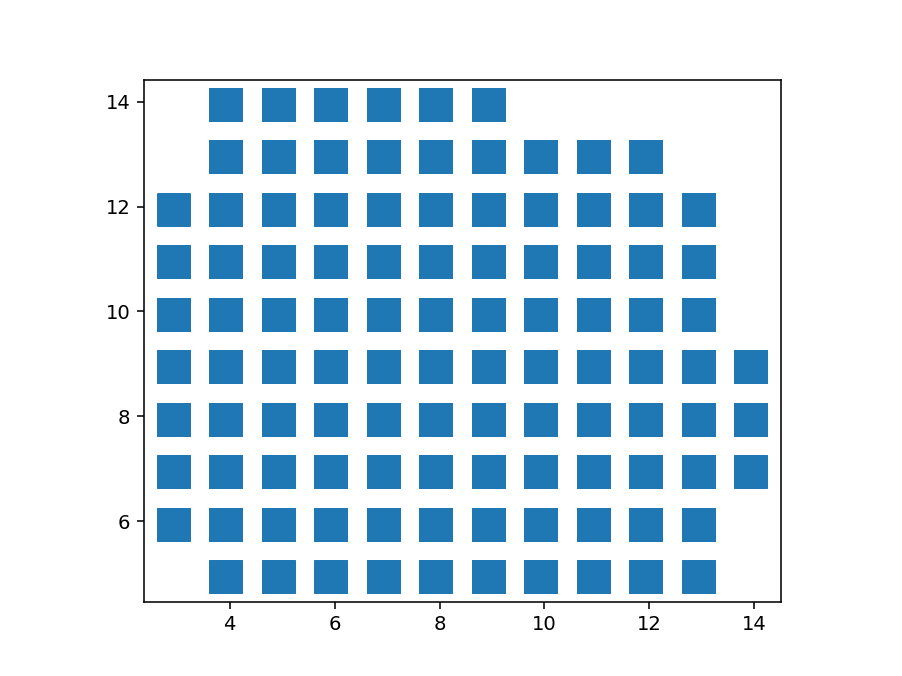

In [31]:
fig, ax = plt.subplots(dpi=141)
for i in range(len(RCs)):
    
    ax.set_aspect(1)
    fig.canvas.draw()
    s = max(1,((ax.get_window_extent().width * delta*72./fig.dpi) ** 2))  
    plt.scatter((np.array(RCs[i])[:,0]-delta), (np.array(RCs[i])[:,3]-delta), s=s, marker='s', label=i+1)
# plt.legend()
plt.show()

In [33]:
RCs = cds.get_recurrent_components(includeselfedges=False)

RPcubes = {}

for i in range(0,len(RCs)):#range(0,1)
    RPcubes[i] = []
    print("Component", i+1)
    RPcubes[i].append(RCs[i])
    
    #Get (isolated) neighbourhood (candidate) around recurrent set
    Nbhd = RPcubes[i][0]
    print("Finding isolated nbhd")
    S = cds.invariantPart(Nbhd)
    M = cds.cubical_wrap(S).intersection(cds.G.nodes())
#     for mstep in range(1):
#         M = cds.cubical_wrap(M).intersection(cds.G.nodes())
    
    #calculate index pair
    try:
        print("Calculating index pair")
        P1, P0, Pbar1, Pbar0 = cds.index_pair(M)
    
        #write index pairs to file for Conley index calcualtion with CHomP
        
        P1graph = nx.subgraph(cds.G, P1)
        cubefile, mapfile = cf.write_mapandcubes(P1graph, cds.delta, cds)
        with open('rc%s_P1_map.map'%(i+1), 'w') as f:
            f.writelines(mapfile)
        with open('rc%s_P1_cubes.cub'%(i+1), 'w') as f:
            f.writelines(cubefile)
            
        P0graph = nx.subgraph(cds.G, P0)
        cubefile, mapfile = cf.write_mapandcubes(P0graph, cds.delta, cds)
        with open('rc%s_P0_cubes.cub'%(i+1), 'w') as f:
            f.writelines(cubefile)
            
        print("Calculating homology")
        
#         proc = subprocess.Popen(['homcubes', '-i', 'rc%s_P1_map.map'%(i+1)],stdout=subprocess.PIPE)
#         proc = subprocess.Popen(['homcubes', '-i', 'rc%s_P1_cubes.cub'%(i+1), 'rc%s_P0_cubes.cub'%(i+1)],stdout=subprocess.PIPE)
        proc = subprocess.Popen(['homcubes', '-i',
                                 'rc%s_P1_map.map'%(i+1), 
                                 'rc%s_P1_cubes.cub'%(i+1),
                                 'rc%s_P0_cubes.cub'%(i+1)], stdout=subprocess.PIPE)

        linenum = 0
#         print(proc.stdout.readlines())
        while True:
            line = proc.stdout.readline()
            if not line:
                break
#             print("           "+line.rstrip().decode('UTF-8'))
            if line.rstrip().decode('UTF-8')[0] in ['H', '	', 'D', 'F'] and not line.rstrip().decode('UTF-8')[1] == 'O':
#             if line.rstrip().decode('UTF-8')[0:2] == 'H_' or line.rstrip().decode('UTF-8')[0:2] == '  ' or line.rstrip().decode('UTF-8')[0:2] == 'Di':
                
                print("           "+line.rstrip().decode('UTF-8'))
            linenum+=1
            
    except Exception as e:
        if e=='too many values to unpack (expected 4)':
            print('Faile')
        else:
            print(e)

Component 1
Finding isolated nbhd
Calculating index pair
Calculating homology
           H_0 = Z
           H_1 = Z^41
           H_0 = Z
           H_1 = Z^6
           H_2 = Z
           Dim 0:	f (x1) = y1
           Dim 1:	f (x1) = 0
           	f (x2) = 0
           	f (x3) = 0
           	f (x4) = 0
           	f (x5) = 0
           	f (x6) = 0
           	f (x7) = 0
           	f (x8) = 0
           	f (x9) = 0
           	f (x10) = y4
           	f (x11) = 0
           	f (x12) = y4 - y6
           	f (x13) = 0
           	f (x14) = 0
           	f (x15) = 0
           	f (x16) = 0
           	f (x17) = -y1 + y2 - y6
           	f (x18) = 0
           	f (x19) = 0
           	f (x20) = 0
           	f (x21) = 0
           	f (x22) = 0
           	f (x23) = -y1 + y2 - y6
           	f (x24) = 0
           	f (x25) = y4
           	f (x26) = 0
           	f (x27) = 0
           	f (x28) = -y1 + y2 - y4 - y6
           	f (x29) = 0
           	f (x30) = 0
           	f (x31) = y1 -

In [35]:
proc = subprocess.Popen(['homcubes', '-i',
                                 'rc%s_P1_map.map'%(i+1), 
#                                  'rc%s_P1_cubes.cub'%(i+1),
#                                  'rc%s_P0_cubes.cub'%(i+1)
                        ],
                                    stdout=subprocess.PIPE)

linenum = 0
while True:
    line = proc.stdout.readline()
    if not line:
        break
    print("           "+line.rstrip().decode('UTF-8'))
    linenum+=1

           HOMCUBES, ver. 3.07, 09/25/15. Copyright (C) 1997-2015 by Pawel Pilarczyk.
           This is free software. No warranty. Consult 'license.txt' for details.
           Reading the domain of the map from 'rc1_P1_map.map'... 723 cubes read.
           200000 bit fields allocated (2 MB) to speed up 4-dimensional reduction.
           Reducing full-dim cubes from X... .               37*         375 removed, 348 left.
           Note: The program assumes that the input map is acyclic.
           Reading the map on X from 'rc1_P1_map.map'... Done.
           Verifying if the image of X is contained in Y... Passed.
           Computing the image of the map... and of the inclusion... 607 cubes.
           Reducing full-dim cubes from Y... .               37116 removed, 607 left.
           Transforming X into cells... 348 cells added.
           Transforming Y into cells... 607 cells added.
           Collapsing faces in X... .... 13804 removed, 5570 left.
           Note: The dime

In [34]:
proc = subprocess.Popen(['chkmvmap', 'rc%s_P1_map.map'%(i+1)],
                                    stdout=subprocess.PIPE)

linenum = 0
while True:
    line = proc.stdout.readline()
    if not line:
        break
    print("           "+line.rstrip().decode('UTF-8'))
    linenum+=1

           CHKMVMAP, ver. 0.08. Copyright (C) 1997-2016 by Pawel Pilarczyk.
           This is free software. No warranty. Consult 'license.txt' for details.
           Reading F from 'rc1_P1_map.map'... 723 images read.
           Extracting the domain of F... 723 cubes.
           Extracting the range of F... 723 cubes.
           Checking if F is defined on X\A... Passed.
           Checking if F is defined on A... Passed.
           Verifying that F(X\A) is contained in Y... Passed.
           200000 bit fields allocated (2 MB) to speed up 4-dimensional reduction.
           <The following computations may take a lot of time. Press Ctrl-C to interrupt.>
           Creating a cell complex of X... 29908 cells.
           Verifying that images are acyclic...  0       35:(  0       31      27      24      20      16      12       9       5       17 1      102      99      95      91      88      84      80      76      73      69      65      61      58      54      50      47      43 